### Question 3 : Does the release month of a movie affect its revenue?


At face value, the best months to release a film in were:

1. December
2. June
3. May

However, December had far more films released than any other month. We decided a better metric to gauge the best month to release a film in would be the average revenue of films in that month as opposed to the total.

Under that assumption, the best months to release films in were:

1. May
2. June
3. July

### Question 4 : Which years had the highest grossing films? 

By total value, the 90's, 2010's, and 2020's were the decades with the highest grossing films.

However, in some of the earlier decades examined, there may have been fewer than 10 films released a year.

Upon further examination, we found that the highest average grossing years were:

1. 1937 (Snow White and the Seven Dwarves)
2. 1940 (Pinocchio and Fantasia)
3. 1942 (Bambi)

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup as bs
import bs4 as bs
import urllib.request 
from html_table_parser import HTMLTableParser 
import csv
import seaborn as sns
import scipy.stats as stats
import scipy.stats
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
from IPython.core.display import HTML 

In [114]:
title_crew = pd.read_csv(r'C:\Users\Nick\Downloads\dsc-phase-1-project-online-master\dsc-phase-1-project-online-master\zippedData\title.crew.csv')
movie_gross = pd.read_csv(r'C:\Users\Nick\Downloads\dsc-phase-1-project-online-master\dsc-phase-1-project-online-master\zippedData\bom.movie_gross.csv')
name_basics = pd.read_csv(r'C:\Users\Nick\Downloads\dsc-phase-1-project-online-master\dsc-phase-1-project-online-master\zippedData\name.basics.csv')
title_akas = pd.read_csv(r'C:\Users\Nick\Downloads\dsc-phase-1-project-online-master\dsc-phase-1-project-online-master\zippedData\title.akas.csv')
title_basics = pd.read_csv(r'C:\Users\Nick\Downloads\dsc-phase-1-project-online-master\dsc-phase-1-project-online-master\zippedData\title.basics.csv')
title_crew = pd.read_csv(r'C:\Users\Nick\Downloads\dsc-phase-1-project-online-master\dsc-phase-1-project-online-master\zippedData\title.crew.csv')
title_principals = pd.read_csv(r'C:\Users\Nick\Downloads\dsc-phase-1-project-online-master\dsc-phase-1-project-online-master\zippedData\title.principals.csv')
title_ratings = pd.read_csv(r'C:\Users\Nick\Downloads\dsc-phase-1-project-online-master\dsc-phase-1-project-online-master\zippedData\title.ratings.csv')
tmdb_movies = pd.read_csv(r'C:\Users\Nick\Downloads\dsc-phase-1-project-online-master\dsc-phase-1-project-online-master\zippedData\tmdb.movies.csv')
tn_movie_budgets = pd.read_csv(r'C:\Users\Nick\Downloads\dsc-phase-1-project-online-master\dsc-phase-1-project-online-master\zippedData\tn.movie_budgets.csv')

In [115]:
# standardizes the date format of the release date column

tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets.release_date)

In [116]:
# creates a list of numbers

numbers = ['1','2','3','4','5','6','7','8','9','0'] 

# a function that removes the string characters such as "$" or "," by using the list created above

def convertToInt(column):
    return int(''.join(filter(lambda x: x in numbers, column)))

In [117]:
# cleans the columns by passing the convertToInt fucnti

tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].apply(convertToInt)
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].apply(convertToInt)
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].apply(convertToInt)

In [118]:
tn_movie_budgets.groupby(tn_movie_budgets['release_date'].dt.strftime('%B'))['worldwide_gross'].sum().sort_values()

release_date
January      16157646936
September    23019987786
April        27203797390
February     28045454121
October      28343193867
August       30245291880
March        37897684431
July         62023990453
November     65970430672
May          66043077615
June         68268531657
December     75761412153
Name: worldwide_gross, dtype: int64

In [119]:
# scrapes the inflation table from usinflationcalculator.com

from urllib.request import urlopen

from urllib.error import HTTPError

from bs4 import BeautifulSoup

try:


    source = urllib.request.urlopen('https://www.usinflationcalculator.com/inflation/historical-inflation-rates/').read()


except HTTPError as e:

    print(e)
    
else:    
    
    soup = bs.BeautifulSoup(source,'lxml')
    table = soup.find('table')
    table_rows = table.find_all('tr')

# creates an empty list to append scraped data to

    inflation_data = []

# loops through the scraped data and appends it to the empty list 

    for tr in table_rows:
        td = tr.find_all('td')
        row = [i.text for i in td]
        inflation_data.append(row)

In [120]:
# turns the list of lists into a pandas DataFrame

pd_infl_data = pd.DataFrame(inflation_data)
pd_infl_data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,None,None,None,None,None,None,None,None,None,None,None,None,None
1,2.0,1.0,1.0,0.0,2.1,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0
2,1.0,1.0,0.0,2.0,2.0,2.0,1.0,-1.0,-1.0,1.0,1.0,2.0,1.0
3,3.0,4.0,6.1,6.0,5.9,6.9,6.9,7.9,9.9,10.8,11.7,12.6,7.9
4,12.5,15.4,14.3,18.9,19.6,20.4,18.5,19.3,19.8,19.5,17.4,18.1,17.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,1.4,1.0,0.9,1.1,1.0,1.0,0.8,1.1,1.5,1.6,1.7,2.1,1.3
104,2.5,2.7,2.4,2.2,1.9,1.6,1.7,1.9,2.2,2.0,2.2,2.1,2.1
105,2.1,2.2,2.4,2.5,2.8,2.9,2.9,2.7,2.3,2.5,2.2,1.9,2.4
106,1.6,1.5,1.9,2.0,1.8,1.6,1.8,1.7,1.7,1.8,2.1,2.3,1.8


In [121]:
# renames the columns in the pandas DataFrame

pd_infl_data.columns = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','AVE']

In [122]:
# drops the first two rows and calculates the mean of the AVE column

infl_data_drop_nulls = pd_infl_data.drop([0,1])
mean_inflation = pd.to_numeric(pd_infl_data['AVE'], errors='coerce').mean()
print(mean_inflation)

3.2207547169811335


In [123]:
# creates a column with the mean inflation 

infl_data_drop_nulls.index = infl_data_drop_nulls.index - 2
years_list = list(range(1915, 2021))
infl_data_drop_nulls['years'] = years_list
infl_data_drop_nulls['mean inflation'] = 1 + (pd.to_numeric(pd_infl_data['AVE'], errors='coerce').mean()/100)

In [124]:
# creates a multiplier indexed by year with 1915 being 0

infl_data_drop_nulls['mult'] = round((1) / infl_data_drop_nulls['mean inflation'] ** infl_data_drop_nulls.index,4)

In [125]:
# creates a dictionary, 
# the key values are the years 1915-2019 
# item values are the corresponding values from the mult column of infl_data_drop_nulls

inflation_dict = dict(zip(list(infl_data_drop_nulls['years']), list(infl_data_drop_nulls['mult'])))

In [126]:
# creates a function that takes the year and multiplies it by it's dictionary item value

def adjust_for_inflation(x, column):
    '''Takes in a row and the column of the value to adjust'''
    date_str = str(x.release_date)
    year_str = date_str.split('-')[0]
    return round(inflation_dict[int(year_str)] * x[column],2)

In [127]:
tn_movie_budgets['total_gross'] = tn_movie_budgets['worldwide_gross'] + tn_movie_budgets['domestic_gross']
tn_movie_budgets['total_gross_adjusted'] = tn_movie_budgets['total_gross'] = tn_movie_budgets.apply(lambda x: adjust_for_inflation(x, 'total_gross'),axis=1)
tn_movie_budgets['worldwide_gross_adjusted'] = tn_movie_budgets.apply(lambda x: adjust_for_inflation(x, 'worldwide_gross'),axis=1)
tn_movie_budgets['production_budget_adjusted'] = tn_movie_budgets.apply(lambda x: adjust_for_inflation(x, 'production_budget'),axis=1)
tn_movie_budgets['domestic_gross_adjusted'] = tn_movie_budgets.apply(lambda x: adjust_for_inflation(x, 'domestic_gross'),axis=1)
tn_movie_budgets['revenue_adjusted'] = tn_movie_budgets['worldwide_gross_adjusted'] - tn_movie_budgets['production_budget_adjusted']
tn_movie_budgets['foreign_gross'] = tn_movie_budgets['worldwide_gross'] - tn_movie_budgets['domestic_gross']
tn_movie_budgets['foreign_gross_adjusted'] =tn_movie_budgets['worldwide_gross_adjusted'] - tn_movie_budgets['domestic_gross_adjusted']

In [128]:
df1 = tn_movie_budgets.groupby(tn_movie_budgets['release_date'].dt.strftime('%B'))['worldwide_gross_adjusted'].sum().sort_values()

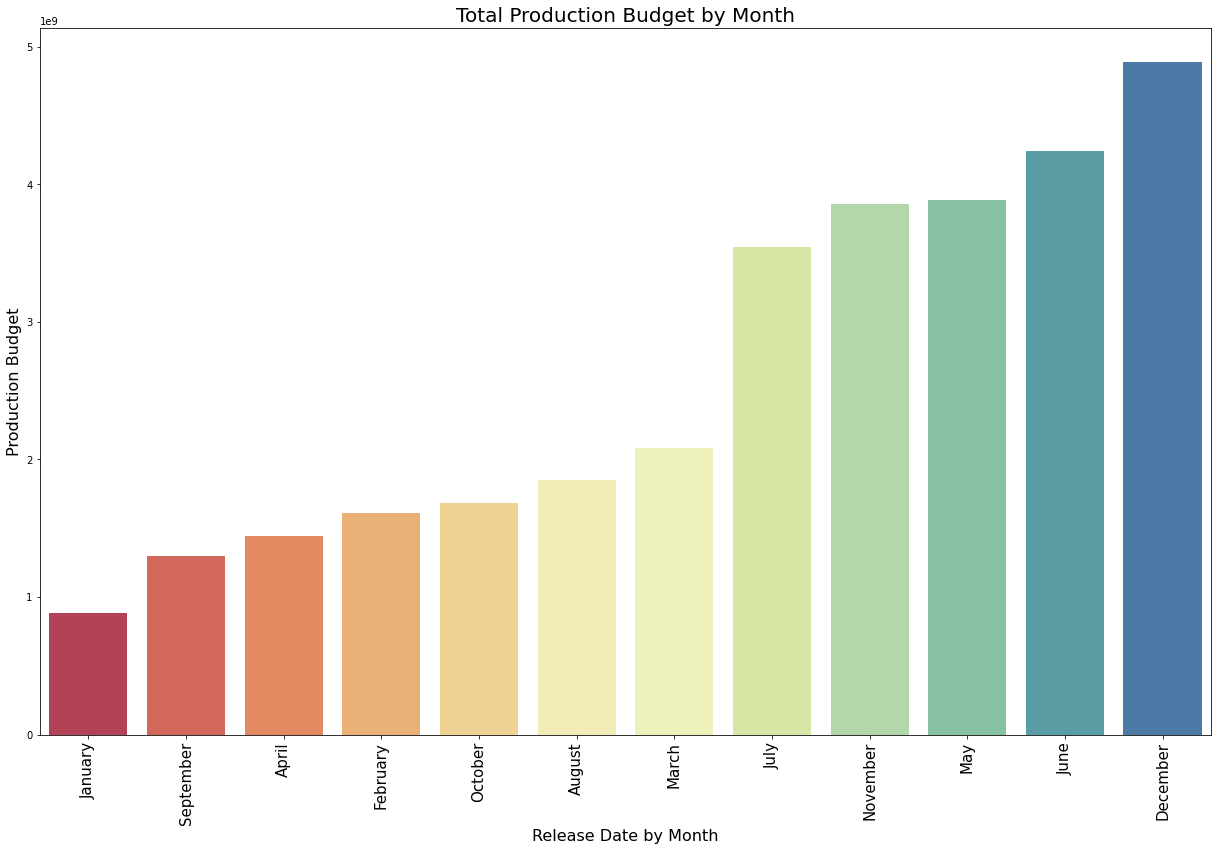

In [129]:
x = df1.index
y=df1

plt.figure(figsize=(21, 13))
ax = sns.barplot(x, y, palette='Spectral')
ax.set_title('Total Production Budget by Month',fontsize= 20)
plt.xticks(rotation=90, fontsize = 15)
plt.xlabel('Release Date by Month', fontsize=16)
plt.ylabel('Production Budget', fontsize=16)
plt.show()

In [130]:
df2 = tn_movie_budgets.groupby(tn_movie_budgets['release_date'].dt.strftime('%B'))['revenue_adjusted'].sum().sort_values()

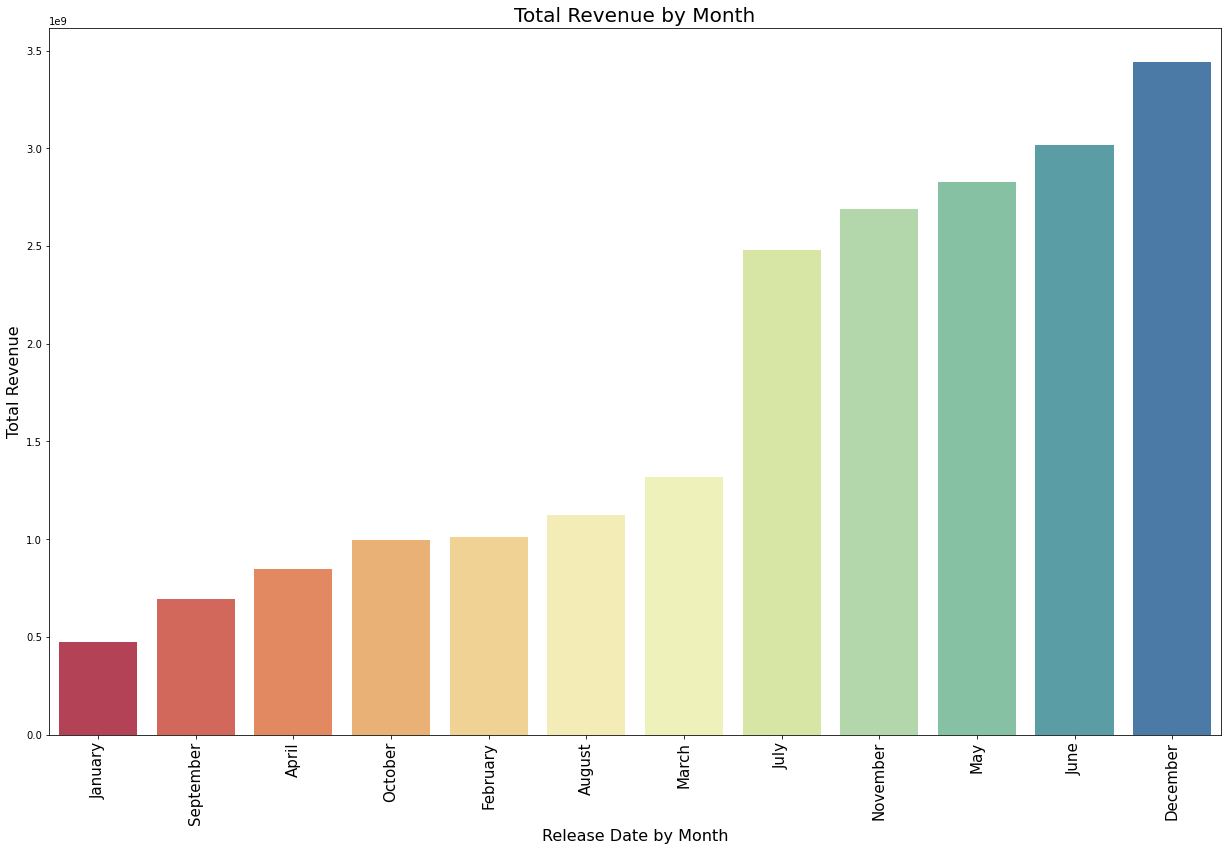

In [131]:
x = df2.index
y=df2

plt.figure(figsize=(21, 13))
ax = sns.barplot(x, y, palette='Spectral')
ax.set_title('Total Revenue by Month',fontsize= 20)
plt.xticks(rotation=90, fontsize = 15)
plt.xlabel('Release Date by Month', fontsize=16)
plt.ylabel('Total Revenue', fontsize=16)
plt.show()

In [132]:
df3 = tn_movie_budgets.groupby(tn_movie_budgets['release_date'].dt.strftime('%B'))['production_budget_adjusted'].mean().sort_values()

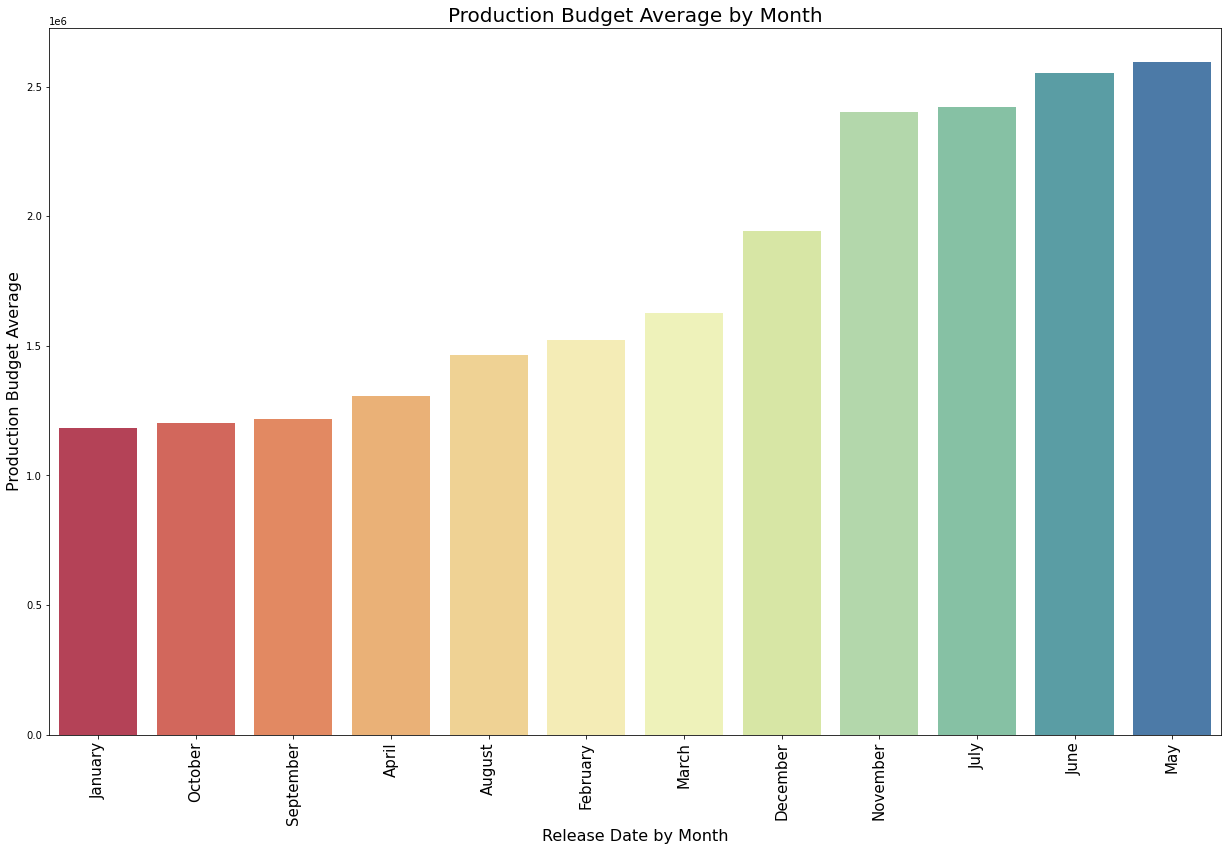

In [133]:
x = df3.index
y=df3

plt.figure(figsize=(21, 13))
ax = sns.barplot(x, y, palette='Spectral')
ax.set_title('Production Budget Average by Month',fontsize= 20)
plt.xticks(rotation=90, fontsize = 15)
plt.xlabel('Release Date by Month', fontsize=16)
plt.ylabel('Production Budget Average', fontsize=16)
plt.show()

In [134]:
df4 = tn_movie_budgets.groupby(tn_movie_budgets['release_date'].dt.strftime('%B'))['revenue_adjusted'].mean().sort_values()

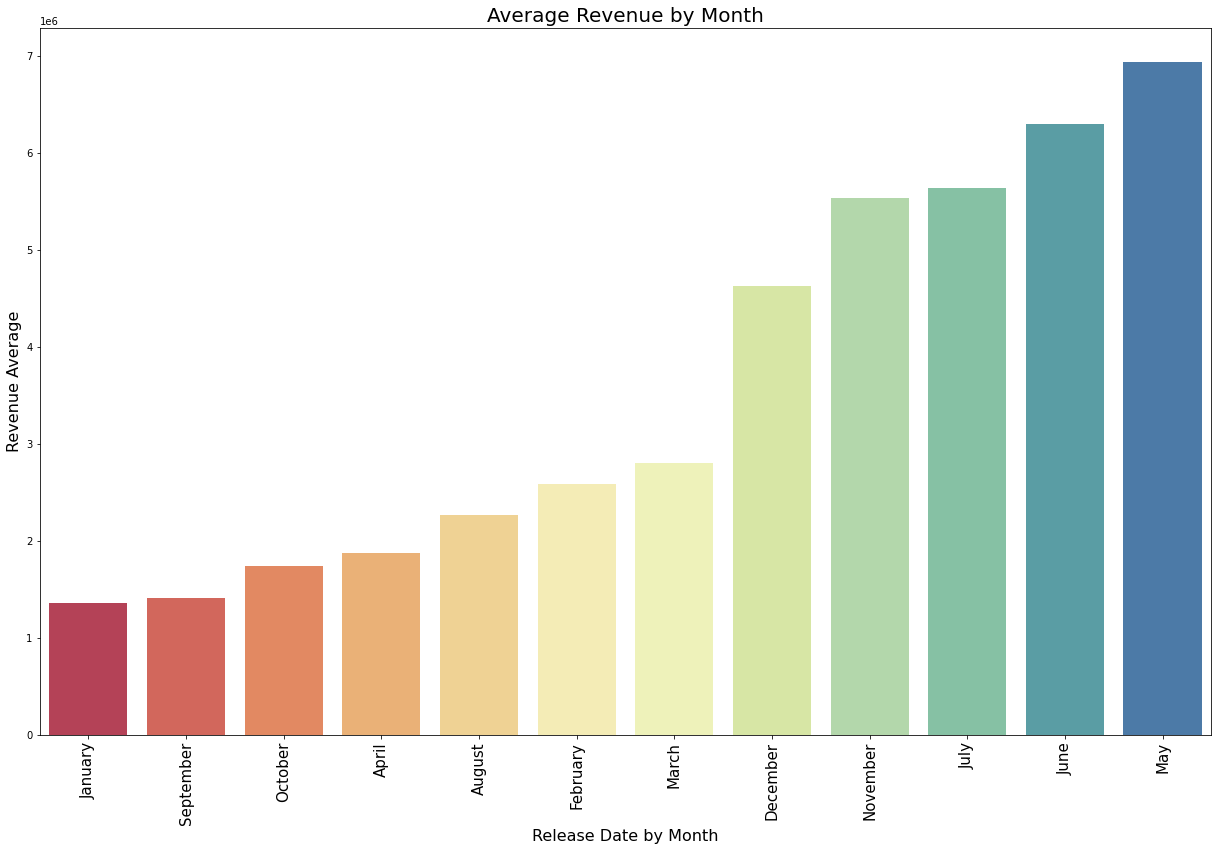

In [135]:
x = df4.index
y=df4

plt.figure(figsize=(21, 13))
ax = sns.barplot(x, y, palette='Spectral')
ax.set_title('Average Revenue by Month',fontsize= 20)
plt.xticks(rotation=90, fontsize = 15)
plt.xlabel('Release Date by Month', fontsize=16)
plt.ylabel('Revenue Average', fontsize=16)
plt.show()

In [136]:
df = tn_movie_budgets.groupby(tn_movie_budgets['release_date'].dt.strftime('%B'))['movie'].count().sort_values()

In [137]:
df

release_date
January      347
February     392
May          407
July         440
April        454
March        470
June         479
November     486
September    493
August       496
October      573
December     745
Name: movie, dtype: int64

In [138]:
df12 = tn_movie_budgets.groupby(tn_movie_budgets['release_date'].dt.strftime('%Y'))['worldwide_gross_adjusted'].mean().sort_values()

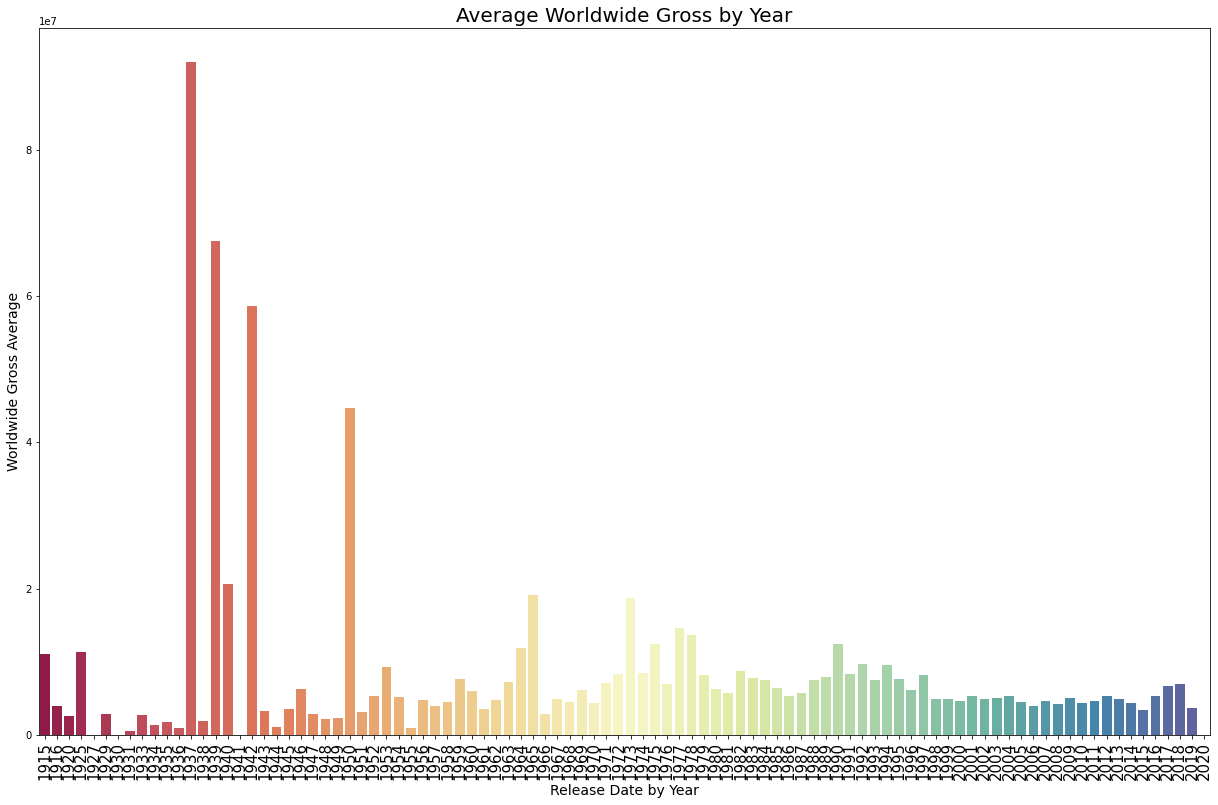

In [139]:
x = df12.index
y=df12

plt.figure(figsize=(21, 13))
ax = sns.barplot(x, y, palette='Spectral')
ax.set_title('Average Worldwide Gross by Year',fontsize= 20)
plt.xticks(rotation=90, fontsize = 15)
plt.xlabel('Release Date by Year', fontsize=14)
plt.ylabel('Worldwide Gross Average', fontsize=14)
plt.show()

In [140]:
df5 = tn_movie_budgets.groupby(tn_movie_budgets['release_date'].dt.strftime('%Y'))['worldwide_gross_adjusted'].sum().sort_values()

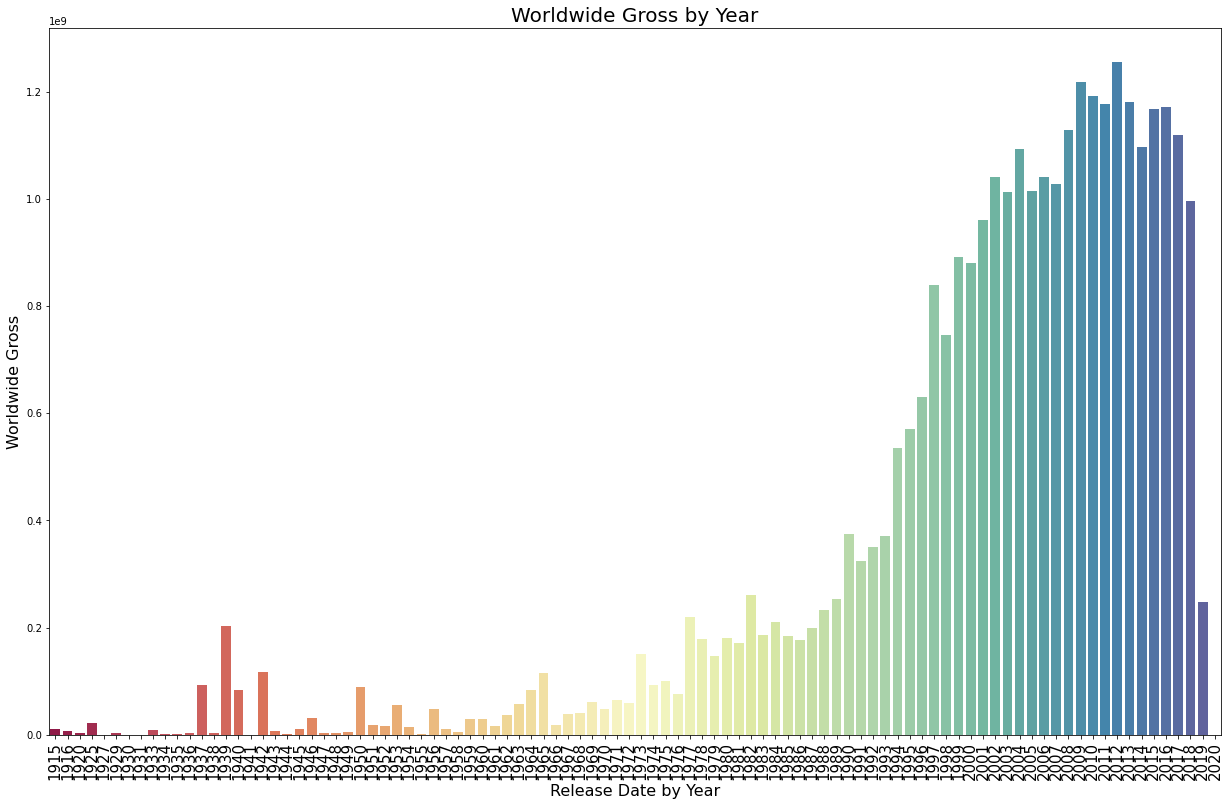

In [141]:
x = df5.index
y=df5

plt.figure(figsize=(21, 13))
ax = sns.barplot(x, y, palette='Spectral')
ax.set_title('Worldwide Gross by Year',fontsize= 20)
plt.xticks(rotation=90, fontsize = 15)
plt.xlabel('Release Date by Year', fontsize=16)
plt.ylabel('Worldwide Gross', fontsize=16)
plt.show()

In [142]:
df6 = tn_movie_budgets.groupby(tn_movie_budgets['release_date'].dt.strftime('%Y'))['domestic_gross_adjusted'].sum()

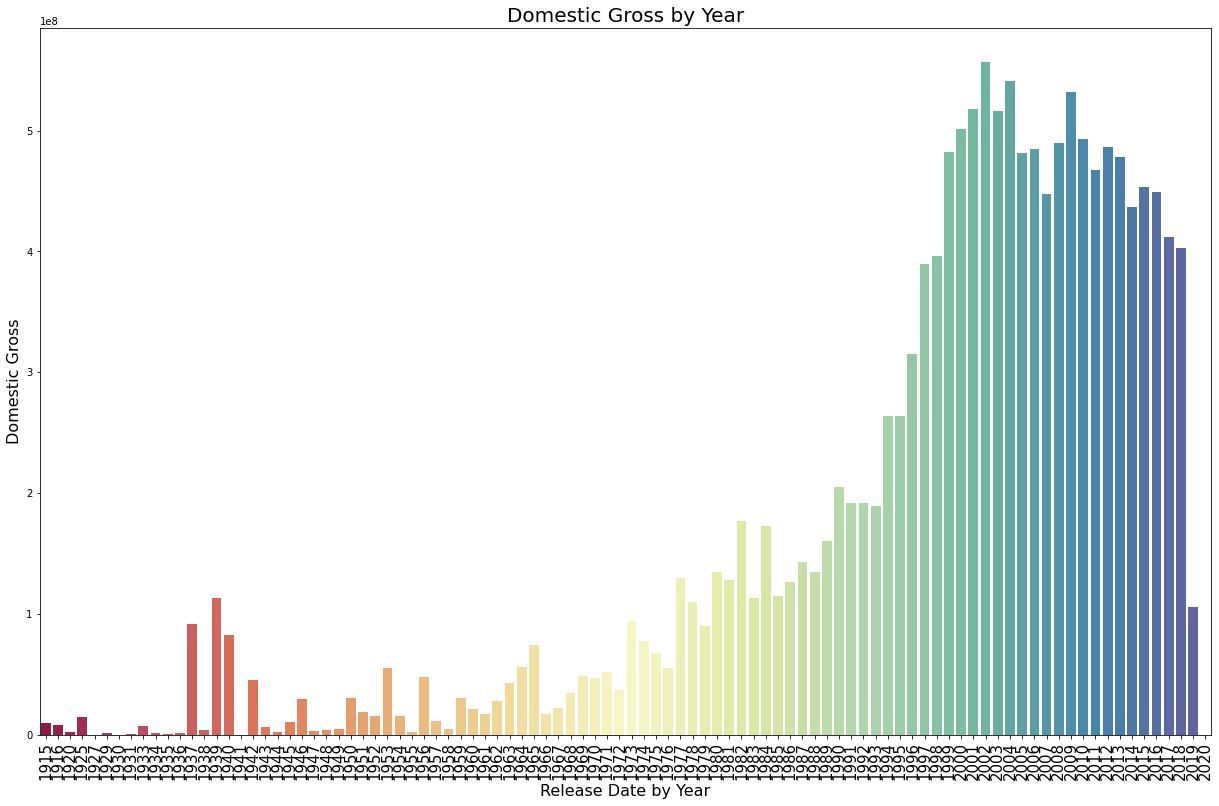

In [143]:
x = df6.index
y=df6

plt.figure(figsize=(21, 13))
ax = sns.barplot(x, y, palette='Spectral')
ax.set_title('Domestic Gross by Year',fontsize= 20)
plt.xticks(rotation=90, fontsize = 15)
plt.xlabel('Release Date by Year', fontsize=16)
plt.ylabel('Domestic Gross', fontsize=16)
plt.show()

In [144]:
df7 = tn_movie_budgets.groupby(tn_movie_budgets['release_date'].dt.strftime('%Y'))['foreign_gross_adjusted'].sum()

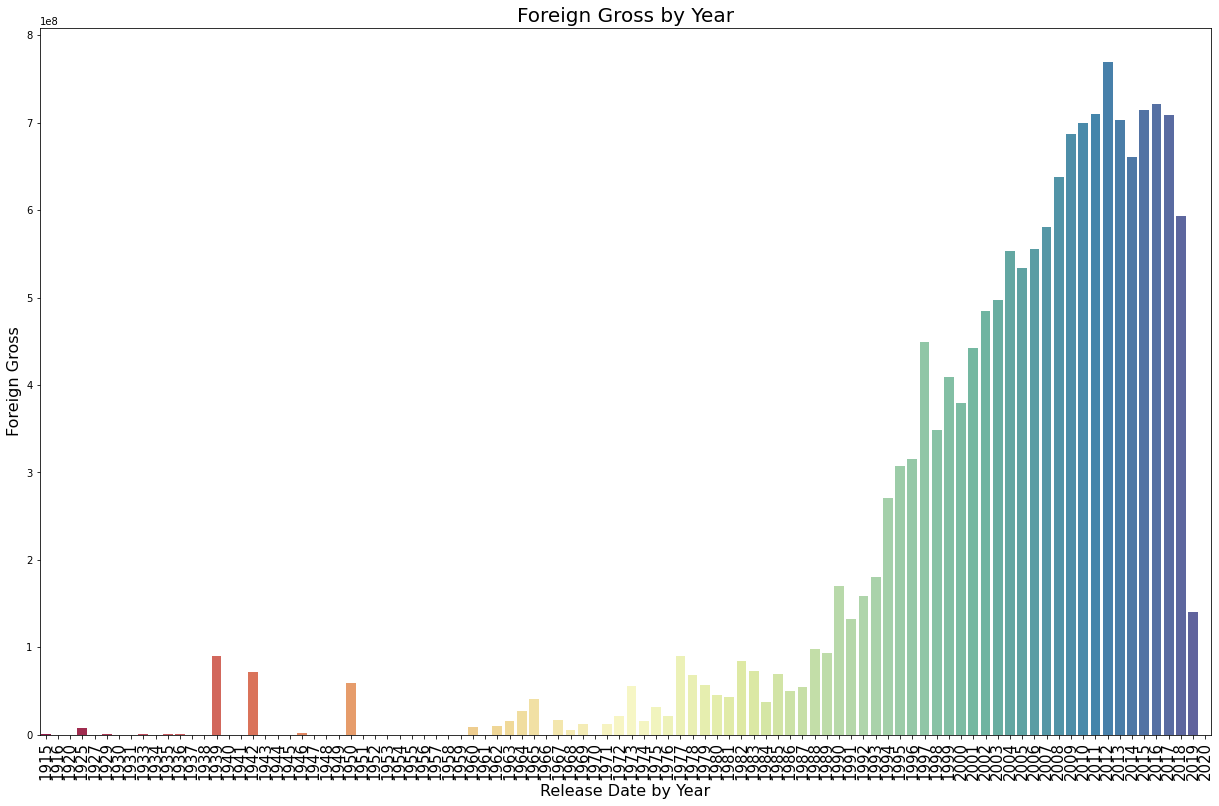

In [145]:
x = df7.index
y=df7

plt.figure(figsize=(21, 13))
ax = sns.barplot(x, y, palette='Spectral')
ax.set_title('Foreign Gross by Year',fontsize= 20)
plt.xticks(rotation=90, fontsize = 15)
plt.xlabel('Release Date by Year', fontsize=16)
plt.ylabel('Foreign Gross', fontsize=16)
plt.show()

In [146]:
df8 = tn_movie_budgets.groupby(tn_movie_budgets['release_date'].dt.strftime('%Y'))['production_budget_adjusted'].sum()

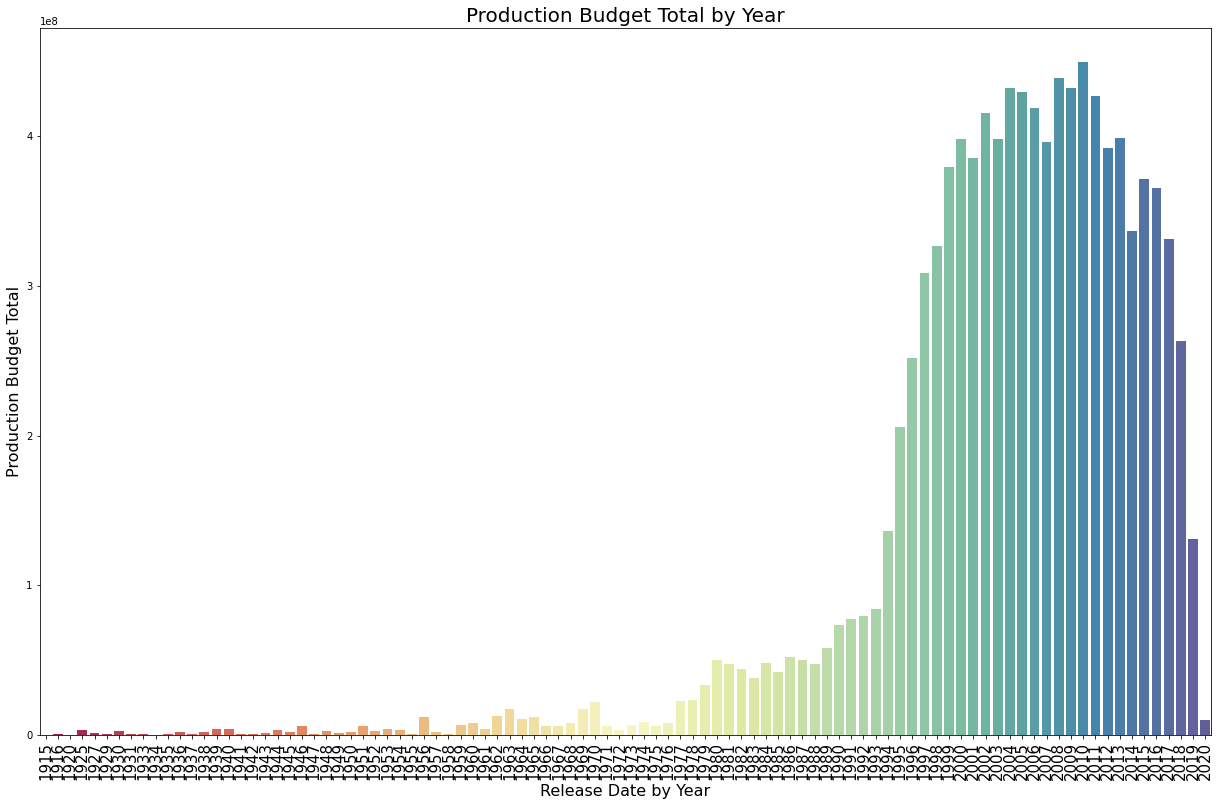

In [147]:
x = df8.index
y=df8

plt.figure(figsize=(21, 13))
ax = sns.barplot(x, y, palette='Spectral')
ax.set_title('Production Budget Total by Year', fontsize= 20)
plt.xticks(rotation=90, fontsize = 15)
plt.xlabel('Release Date by Year', fontsize=16)
plt.ylabel('Production Budget Total', fontsize=16)
plt.show()

In [148]:
df9 = tn_movie_budgets.groupby(tn_movie_budgets['release_date'].dt.strftime('%Y'))['production_budget_adjusted'].mean()

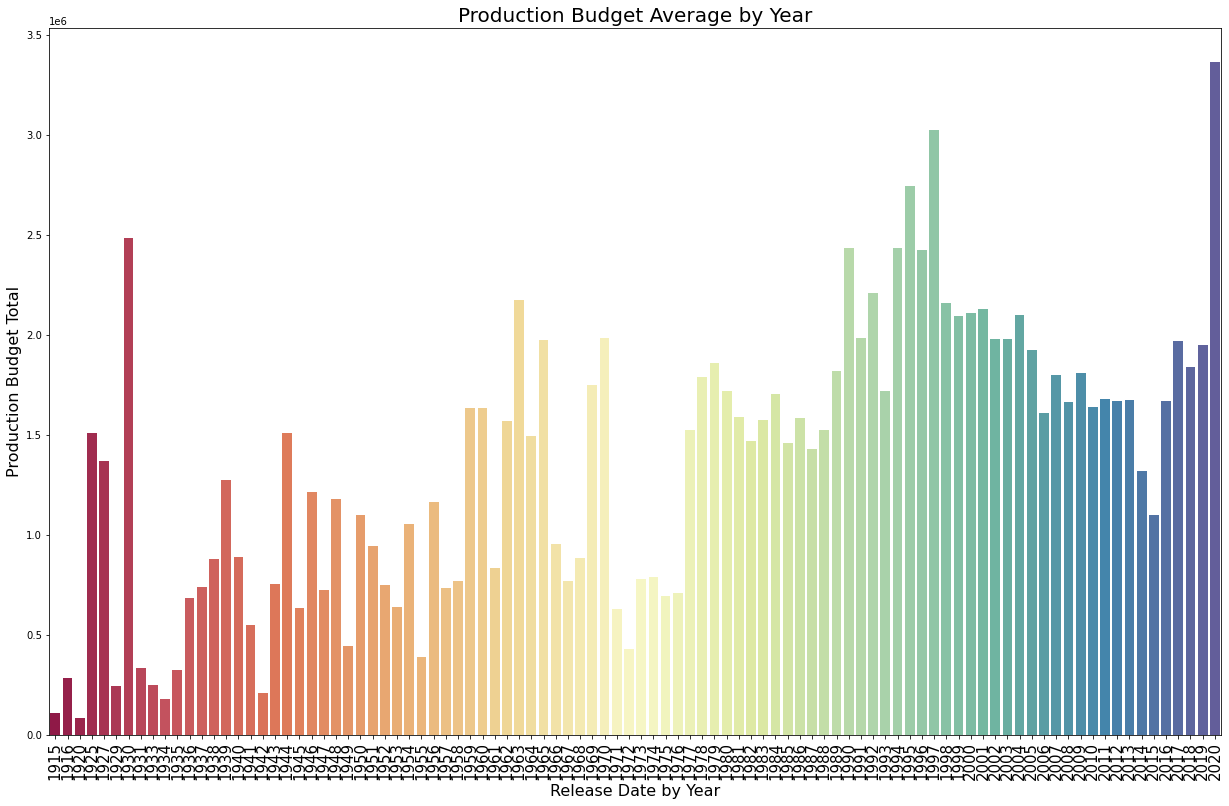

In [149]:
x = df9.index
y=df9

plt.figure(figsize=(21, 13))
ax = sns.barplot(x, y, palette='Spectral')
ax.set_title('Production Budget Average by Year', fontsize= 20)
plt.xticks(rotation=90, fontsize = 15)
plt.xlabel('Release Date by Year', fontsize=16)
plt.ylabel('Production Budget Total', fontsize=16)
plt.show()

In [150]:
df10 = tn_movie_budgets.groupby(tn_movie_budgets['release_date'].dt.strftime('%Y'))['movie'].count()

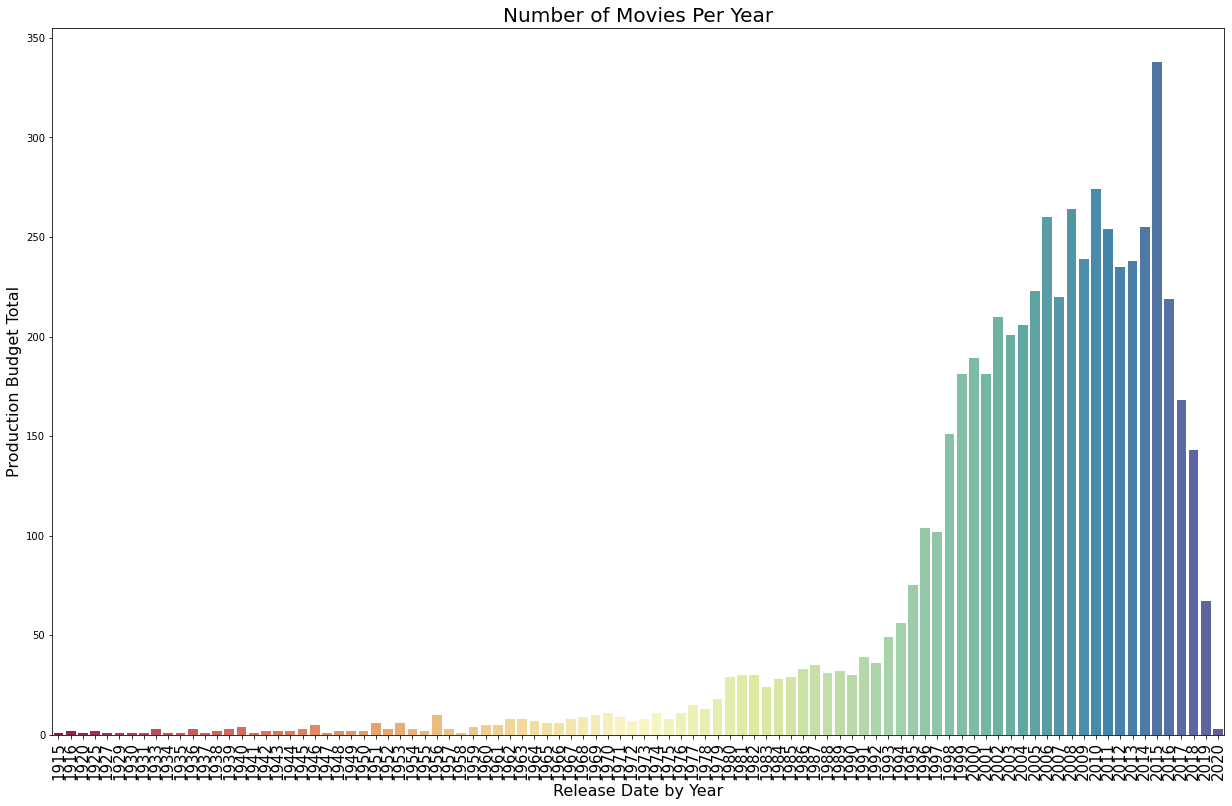

In [151]:
x = df10.index
y=df10

plt.figure(figsize=(21, 13))
ax = sns.barplot(x, y, palette='Spectral')
ax.set_title('Number of Movies Per Year', fontsize= 20)
plt.xticks(rotation=90, fontsize = 15)
plt.xlabel('Release Date by Year', fontsize=16)
plt.ylabel('Production Budget Total', fontsize=16)
plt.show()